In [14]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F

from pyspark.ml import PipelineModel
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml.evaluation import RegressionEvaluator

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [8]:
spark = SparkSession.builder.master("local[2]").getOrCreate()

# load the models

In [3]:
pipeline_model = PipelineModel.load('/Users/macbook/Desktop/morePro/trained_models/model_pipeline')
lr_model = LinearRegressionModel.load('/Users/macbook/Desktop/morePro/trained_models/model_lr')

# Load the test data

In [9]:
df_test = spark.read.format("csv")\
    .option("delimiter", ",")\
    .option("header", "True")\
    .load('/Users/macbook/Desktop/morePro/data/test_df.csv',inferSchema= True)\
    .drop('_c0')


In [15]:
rul = pd.read_csv('/Users/macbook/Desktop/morePro/data/test_rul.csv')

In [16]:
df_test.show(5)

+------------------+------------------+-------------+-----------------+---------------+---------------+---+---+----+------+-----+----+----------+------+------------+-------------+------+
|           voltage|           current|contact_force| angular_velocity|linear_velocity|cutter_position| F1| F2|beta|CNC_id|cycle|mass|resistance|radius|torque_const|voltage_const|censor|
+------------------+------------------+-------------+-----------------+---------------+---------------+---+---+----+------+-----+----+----------+------+------------+-------------+------+
|14.018901483057599|               0.0|            0|              0.1|            0.0|            0.0|0.0|4.0| 0.1|     5|    0|3.05|       0.5|  0.32|         1.4|          0.3|     1|
|  32.8294147090145|   14.695170041425|            0|7.594252064961379|            0.0|            0.0|0.0|4.0| 0.1|     5|    1|3.05|       0.5|  0.32|         1.4|          0.3|     1|
|  49.1857845082135|  31.4478379885061|            0| 30.51630951

# Transform the data and make predictions

In [11]:
test_transformedData = pipeline_model.transform(df_test)
#aft_pred = aft_model.transform(test_transformedData)
lr_pred = lr_model.transform(test_transformedData)
#dt_pred = dt_model.transform(test_transformedData)
#gbt_pred = gbt_model.transform(test_transformedData)
#rf_pred = rf_model.transform(test_transformedData)

# prediction vs rul

In [17]:
y_lr = np.array(lr_pred.select('prediction').collect())
#y_aft = np.array(aft_pred.select('prediction').collect())
#y_dt = np.array(dt_pred.select('prediction').collect())
#y_rf = np.array(dt_pred.select('prediction').collect())
#y_gbt = np.array(gbt_pred.select('prediction').collect())

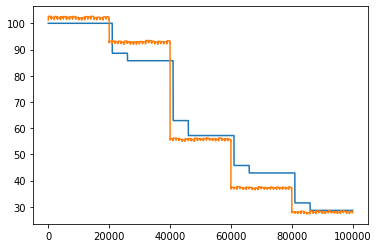

In [19]:
plt.plot(rul)
plt.plot(y_lr[0:-1])

# Metric evaluation

In [ ]:
predictions = [lr_pred,dt_pred,rf_pred,gbt_pred,aft_pred]
names = ['linear_regression', 'decision_tree','random_forest','gradient_boosting_tree','survival_regression']

# MAE

In [41]:
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
for name,preds in zip(names,predictions):
    print("%s MAE on test data = %g" % (name,evaluator.evaluate(preds)))

linear_regression MAE on test data = 4.40019
decision_tree MAE on test data = 4.63777
random_forest MAE on test data = 6.31273
gradient_boosting_tree MAE on test data = 5.60826
survival_regression MAE on test data = 9.00669


# MSE

In [42]:
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mse")
for name,preds in zip(names,predictions):
    print("%s MSE on test data = %g" % (name,evaluator.evaluate(preds)))

linear_regression MSE on test data = 32.2751
decision_tree MSE on test data = 57.6234
random_forest MSE on test data = 63.2176
gradient_boosting_tree MSE on test data = 62.4663
survival_regression MSE on test data = 138.355


# R2-Score

In [43]:
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
for name,preds in zip(names,predictions):
    print("%s R2 on test data = %g" % (name,evaluator.evaluate(preds)))

linear_regression R2 on test data = 0.953311
decision_tree R2 on test data = 0.916642
random_forest R2 on test data = 0.908549
gradient_boosting_tree R2 on test data = 0.909636
survival_regression R2 on test data = 0.799856
